# Single Perceptron

### What is a Perceptron?
- A single perceptron is a feed-forward network based on a threshold transfer function. Single perceptron is the simplest type of artificial neural networks and can only classify linearly separable cases with a binary target (1 , 0).

- A Perceptron is a form of a linear classifier, meaning that a straight line should divide the data in half.


![alt text](https://www.askpython.com/wp-content/uploads/2020/10/linearly-separable-dataset-examples.png)

### How does a Single Perceptron work?
A single Perceptron consists of 4 key features:

Input value: 
- The input layer of the perceptron is made of artificial input neurons and takes the initial data into the system for further processing.

Weights and Bias:
- Weight: It represents the dimension or strength of the connection between units. If the weight to node 1 to node 2 has a higher quantity, then neuron 1 has a more considerable influence on the neuron. 

- Bias: It is the same as the intercept added in a linear equation. It is an additional parameter which task is to modify the output along with the weighted sum of the input to the other neuron.

Net sum: 
- It calculates the total sum.

Activation Function: 
- A neuron can be activated or not, is determined by an activation function. The activation function calculates a weighted sum and further adding bias with it to give the result.

![alt text](https://vitalflux.com/wp-content/uploads/2021/08/perceptron-single-layer-neural-network-comprising-of-single-neuron.png)

We will be using the seeds dataset to train and implement the Single Perceptron


In [1]:
# Lets import some functions that we will be using
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
sns.set_theme()

Because the Perceptron learning method can be classified as a binary problem, we have to choose two types of seeds that we want to train on. For this, I will be using types 2 and 3  as well as using the area and Asymmetry.Coeff of these types of seeds.

<class 'numpy.ndarray'>


/var/folders/sr/2l4czxjx6s9532hf9nvxmn8h0000gn/T/ipykernel_50218/193603978.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r^" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^', color = "dodgerblue")
/var/folders/sr/2l4czxjx6s9532hf9nvxmn8h0000gn/T/ipykernel_50218/193603978.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bs" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', color = "deeppink")


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

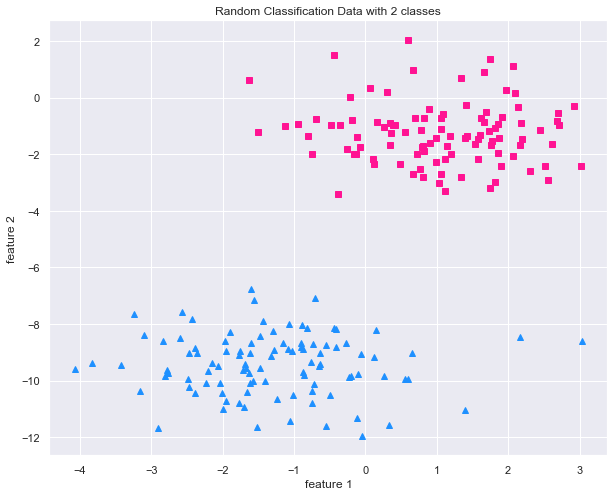

In [51]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples = 200, n_features = 2,
                           centers = 2,cluster_std = 1.05,
                           random_state = 2)
                           
#Plotting
print(type(X))
y = np.where(y == 0, -1, 1)
fig = plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^', color = "dodgerblue")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', color = "deeppink")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')


#print(y)

In [3]:
class Perceptron(object):
    def __init__(self, eta = .05, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [52]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(eta = .01, epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

In [53]:
# Predict labels on the features in X
y_hat = percep.predict(X)
print(y_hat)
print(y)

# Compare y_hat and y
#print(y == y_hat)

[ 1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1
 -1  1 -1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1  1  1  1 -1
 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1
  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1  1 -1
 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1
 -1  1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1
 -1  1  1 -1 -1 -1  1 -1]
[ 1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1
 -1  1 -1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1  1  1  1 -1
 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1
  1  1 -1 -1 -1  1 -1 -1 

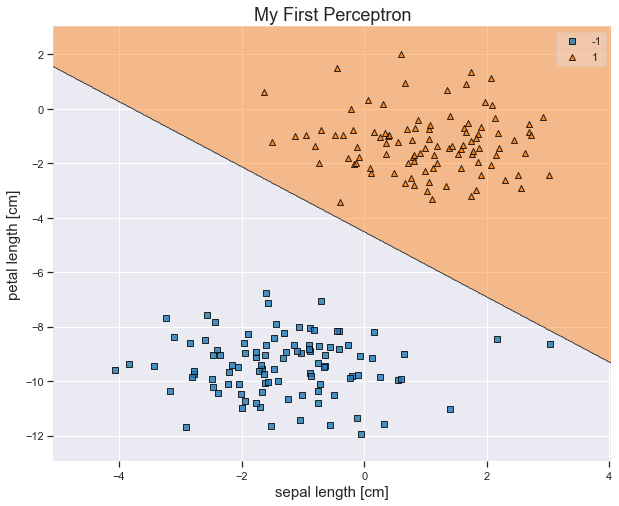

In [54]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()

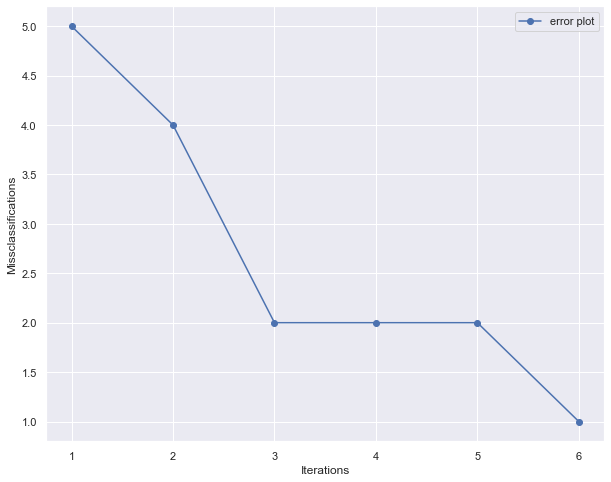

In [55]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()